In [1]:
import pandas as pd
import openpyxl
import numpy as np
import os
import glob2
import glob
import random
import sklearn
import ntpath
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from nltk.test.portuguese_en_fixt import setup_module
import nltk
from contextlib import nullcontext
import unicodedata
import plotly
import read_file_exec as rfe
## Puxada dos dados modelados do processo de extração
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm

In [2]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(42)

In [3]:
## Puxada dos dados modelados do processo de extração
dados_modelo_categoria = rfe.read_file('features/dados_modelo_categoria.xlsx').get_df()
dados_modelo_produto = rfe.read_file('features/dados_modelo_produto.xlsx').get_df()


In [4]:
dados_linha = dados_modelo_categoria.query('categoria == "linha"')
dados_la = dados_modelo_categoria.query('categoria == "la"')
dados_armarinho = dados_modelo_categoria.query('categoria == "armarinho"')

In [5]:
print(dados_linha)
print(dados_la)
print(dados_armarinho)

     categoria   data_dia   ano  mes  mes_ano  quant_  qtd_norm   total
939      linha 2020-09-13  2020    9  2020-09    21.0  0.020892  221.50
940      linha 2020-09-14  2020    9  2020-09    41.0  0.040820  307.54
941      linha 2020-09-15  2020    9  2020-09    49.0  0.048802  805.90
942      linha 2020-09-16  2020    9  2020-09    38.0  0.037844  307.20
943      linha 2020-09-17  2020    9  2020-09    57.0  0.056706  458.60
...        ...        ...   ...  ...      ...     ...       ...     ...
1472     linha 2022-07-26  2022    7  2022-07    18.0  0.017910  269.25
1473     linha 2022-07-27  2022    7  2022-07    13.0  0.012922  219.98
1474     linha 2022-07-28  2022    7  2022-07     8.0  0.007958  109.10
1475     linha 2022-07-29  2022    7  2022-07    13.0  0.012946   67.54
1476     linha 2022-07-30  2022    7  2022-07     2.0  0.001988    6.00

[538 rows x 8 columns]
    categoria   data_dia   ano  mes  mes_ano  quant_  qtd_norm   total
533        la 2020-09-14  2020    9  2020

In [6]:
#most sold product in each category by month
df = dados_modelo_produto.groupby(['categoria', 'mes_ano', 'codigo']).sum().reset_index().sort_values(by=['mes_ano','quant_'], ascending=False)
df

categoria  mes_ano          codigo  numero    ano  mes  quant_  qtd_norm   total
3607  armarinho  2022-07         7101619  415683  22242   77  1052.0  1.051940  189.18
3535  armarinho  2022-07         7099759   38252   2022    7   100.0  0.099995   28.00
3589  armarinho  2022-07         7101466   37781   2022    7   100.0  0.099995    6.00
3602  armarinho  2022-07         7101592  227196  12132   42    91.0  0.090965   31.48
3649  armarinho  2022-07         8099816  226143  12132   42    53.0  0.052964   26.38
...         ...      ...             ...     ...    ...  ...     ...       ...     ...
5431      linha  2020-09  N126100-005838   11659   2020    9     1.0  0.000994    2.00
5433      linha  2020-09  N126100-005880   11659   2020    9     1.0  0.000994    2.00
5436      linha  2020-09   N126100-05842   12212   2020    9     1.0  0.000994    2.00
5437      linha  2020-09   N126100-05916   12304   2020    9     1.0  0.000994    2.00
5439      linha  2020-09    N126100-5819   12577   2020    9     1.0  0.000994    2.00

[10218 rows x 9 columns]

In [7]:

df2 = df.query('categoria == "linha"')
df2['taxa_participacao'] = df.groupby(['categoria','codigo'])['quant_'].apply(lambda x: x/x.sum())

df2.sort_values(by=['taxa_participacao'], ascending=False)

categoria  mes_ano        codigo  numero   ano  mes  quant_  qtd_norm  total  taxa_participacao
5439     linha  2020-09  N126100-5819   12577  2020    9     1.0  0.000994   2.00           1.000000
7055     linha  2021-05      96909144   22409  2021    5     1.0  0.000994  15.00           1.000000
7114     linha  2021-05        099869   22266  2021    5     1.0  0.000994  16.11           1.000000
7106     linha  2021-05        099813   22237  2021    5     1.0  0.000994  17.50           1.000000
9618     linha  2022-05        099146   36265  2022    5     1.0  0.000994  12.13           1.000000
...        ...      ...           ...     ...   ...  ...     ...       ...    ...                ...
7020     linha  2021-04         98010   21618  2021    4     2.0  0.001994  20.00           0.010256
6783     linha  2021-03         98010   20223  2021    3     1.0  0.000994   9.94           0.005128
8303     linha  2021-10         98010   27988  2021   10     1.0  0.000994  12.90           0.005128
8935     linha  2022-01         98010   31012  2022    1     1.0  0.000994  12.90           0.005128
9158     linha  2022-02         98010   31484  2022    2     1.0  0.000994  12.90           0.005128

[5034 rows x 10 columns]

## Estacionaridade 
A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitar a hipótese nula) é que a série cronológica é estacionária.

Hipótese nula (H0): Se não for rejeitada, sugere que a série cronológica tem uma raiz unitária, o que significa que não é estacionária. Tem alguma estrutura dependente do tempo.
Hipótese alternativa (H1): A hipótese nula é rejeitada; sugere que a série cronológica não tem uma raiz unitária, o que significa que é estacionária. Não tem uma estrutura dependente do tempo.
Interpretamos este resultado utilizando o valor p do teste. Um valor p abaixo de um limiar (como 5% ou 1%) sugere que rejeitamos a hipótese nula (estacionária), caso contrário, um valor p acima do limiar sugere que não rejeitamos a hipótese nula (não estacionária).

* p-valor > 0,05: Não rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e são não-estacionários.
* p-valor <= 0,05: Rejeitar a hipótese nula (H0), os dados não têm uma raiz unitária e são estacionários.

Referente ao teste de Dickey-Fulley é tido que se seu valor é menor que o valores críticos, tem-se sua significância estatística. Por exemplo, caso seu teste seja menor que o valor límitrofe dos seus 1% de seus valores críticos, 
isto sugere que podemos rejeitar a hipótese nula com um nível de significância inferior a 1% (ou seja, uma probabilidade baixa de que o resultado seja uma casualidade estatística).


In [8]:
''' Teste para ampliação do modelo'''
'''
def check_stationarity(ts):
    dftest = adfuller(ts)
    dftest2 = adfuller(ts.diff().dropna())
    dftest3 = adfuller(ts.diff().diff().dropna())
    adf = dftest[0]
    adf2 = dftest2[0]
    adf3 = dftest3[0]
    pvvalue = dftest[1]
    pvvalue2 = dftest2[1]
    pvvalue3 = dftest3[1]
    critical_value = dftest[4]
    critical_value2 = dftest2[4]
    critical_value3 = dftest3[4]
    print('Results of Dickey-Fuller Test:')
    print('Test Statistic: ', adf)
    print('p-value: ', pvvalue)
    print('Critical Values:')
    for key, value in critical_value.items():
	    print('\t%s: %.3f' % (key, value))
    print('Results of Dickey-Fuller Test 2:')
    print('Test Statistic: ', adf2)
    print('p-value: ', pvvalue2)
    print('Critical Values:')
    for key, value in critical_value2.items():
        print('\t%s: %.3f' % (key, value))

    print('Results of Dickey-Fuller Test 3:')
    print('Test Statistic: ', adf3)
    print('p-value: ', pvvalue3)
    print('Critical Values:')
    for key, value in critical_value3.items():
        print('\t%s: %.3f' % (key, value))

    return adf, adf2, adf3, pvvalue, pvvalue2, pvvalue3, critical_value, critical_value2, critical_value3
        
#    pvalue = dftest[1]
#   critical_value = dftest[4]['5%']
#   if (pvalue < 0.05) and (adf < critical_value):
#       print('The series is stationary')
#       print('ADF Statistic: %f' % dftest[0])
#       print('p-value: %f' % dftest[1])
#       print('Critical Values:')
#       for key, value in dftest[4].items():
#           print('\t%s: %.3f' % (key, value))
#
#   else:
#       print('The series is NOT stationary')
#       print('ADF Statistic: %f' % dftest[0])
#       print('p-value: %f' % dftest[1])
#       print('Critical Values:')
#       for key, value in dftest[4].items():
#           print('\t%s: %.3f' % (key, value))
#   
'''

"\ndef check_stationarity(ts):\n    dftest = adfuller(ts)\n    dftest2 = adfuller(ts.diff().dropna())\n    dftest3 = adfuller(ts.diff().diff().dropna())\n    adf = dftest[0]\n    adf2 = dftest2[0]\n    adf3 = dftest3[0]\n    pvvalue = dftest[1]\n    pvvalue2 = dftest2[1]\n    pvvalue3 = dftest3[1]\n    critical_value = dftest[4]\n    critical_value2 = dftest2[4]\n    critical_value3 = dftest3[4]\n    print('Results of Dickey-Fuller Test:')\n    print('Test Statistic: ', adf)\n    print('p-value: ', pvvalue)\n    print('Critical Values:')\n    for key, value in critical_value.items():\n\t    print('\t%s: %.3f' % (key, value))\n    print('Results of Dickey-Fuller Test 2:')\n    print('Test Statistic: ', adf2)\n    print('p-value: ', pvvalue2)\n    print('Critical Values:')\n    for key, value in critical_value2.items():\n        print('\t%s: %.3f' % (key, value))\n\n    print('Results of Dickey-Fuller Test 3:')\n    print('Test Statistic: ', adf3)\n    print('p-value: ', pvvalue3)\n    p

In [9]:
from statsmodels.tsa.stattools import adfuller

adf_tests = pd.DataFrame()

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    return dfoutput




In [10]:
df_stactionarity = pd.DataFrame()


Gráfico de Qtd de vendas por categoria
--------------------------------------------------
Gráficos de autocorrelação e autocorrelação parcial
--------------------------------------------------
Gráfico de autocorrelação


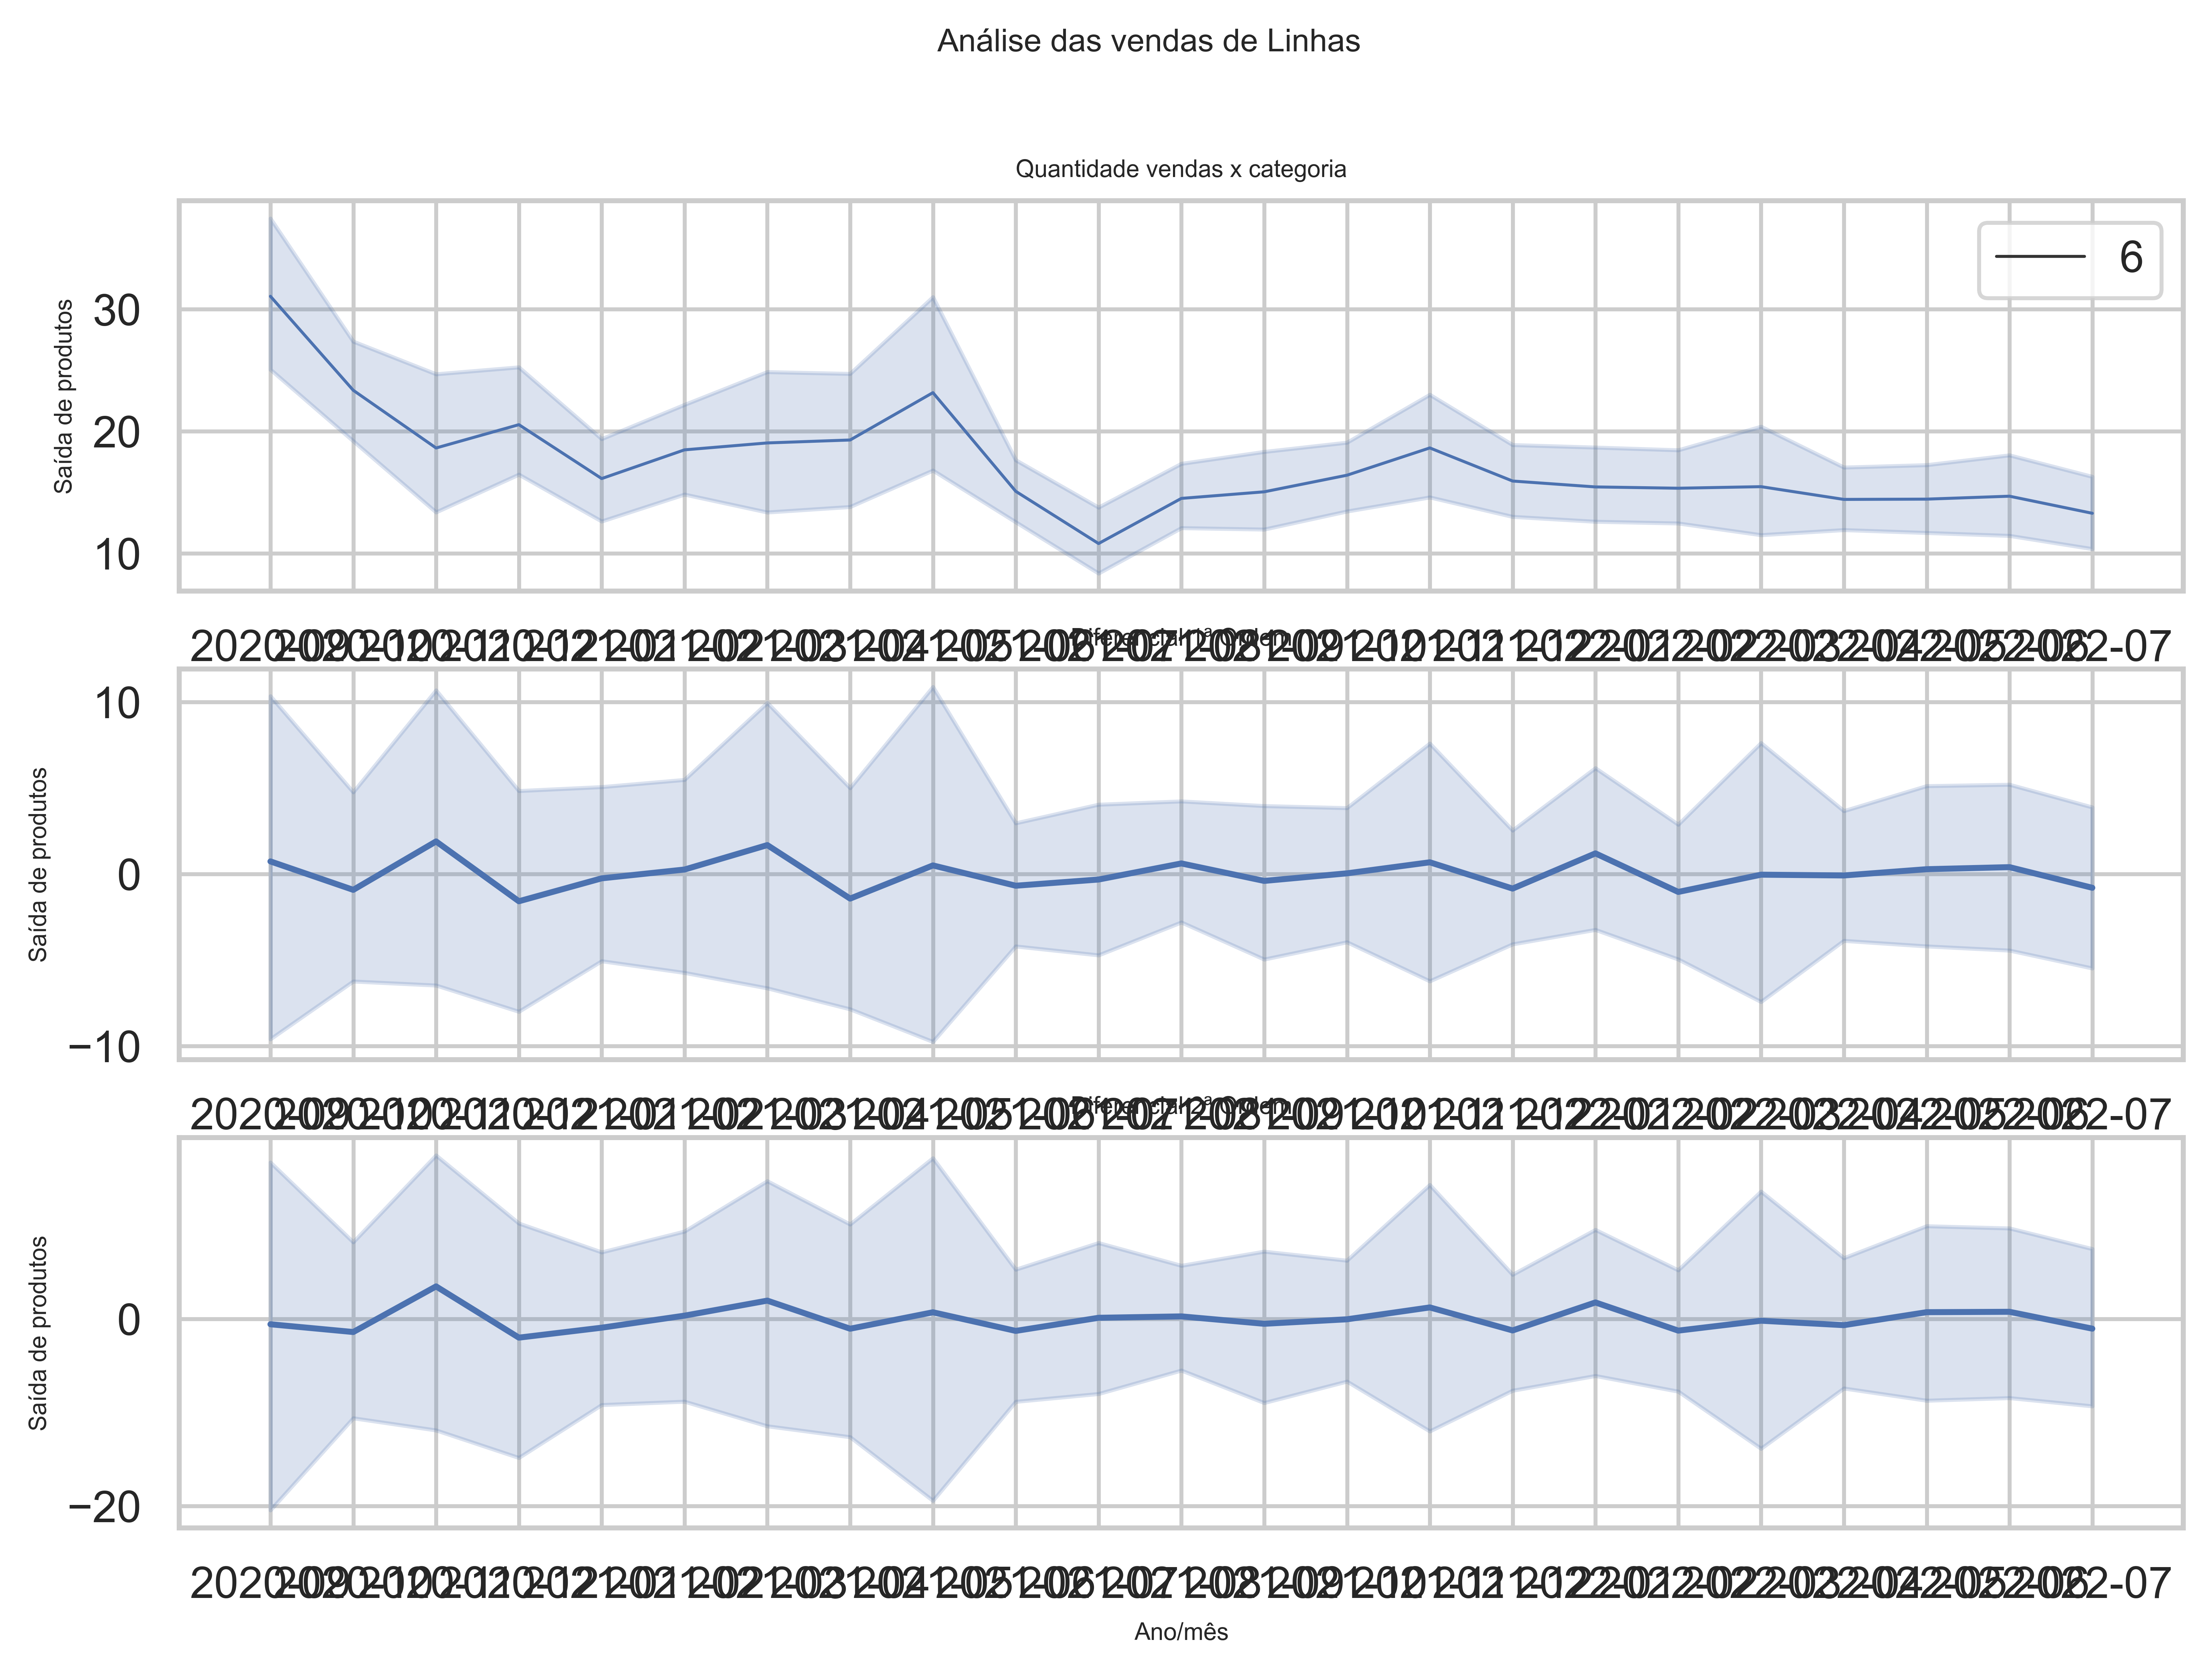

In [20]:
  fig,axes = plt.subplots(3,figsize=(9,6),dpi = 800)
fig.suptitle('Análise das vendas de Linhas', fontsize=8)
axes[0].set_title('Quantidade vendas x categoria', fontsize=6)
axes[0].set_xlabel('Ano/mês', fontsize=6)
axes[0].set_ylabel('Saída de produtos', fontsize=6)
axes[1].set_title('Diferencial 1ª Ordem', fontsize=6)
axes[1].set_ylabel('Saída de produtos', fontsize=6)
axes[1].set_xlabel('Ano/mês', fontsize=6)
axes[2].set_title('Diferencial 2ª Ordem', fontsize=6)
axes[2].set_ylabel('Saída de produtos', fontsize=6)
axes[2].set_xlabel('Ano/mês', fontsize=6)
print('Gráfico de Qtd de vendas por categoria')
try:
    a = sns.lineplot(x='mes_ano', y=(dados_linha['quant_']), data=dados_linha,ax=axes[0], size=6)
    #a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=6)
    #a.set_yticklabels(a.get_yticklabels(), fontsize=6)
    b = sns.lineplot(x='mes_ano', y=(dados_linha['quant_'].diff()), data=dados_linha,ax=axes[1]) #0
    #b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=6)
    #b.set_yticklabels(b.get_yticklabels(), fontsize=6)
    c = sns.lineplot(x='mes_ano', y=(dados_linha['quant_'].diff().diff()), data=dados_linha,ax=axes[2]) #
    #c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=6)
    #c.set_yticklabels(b.get_yticklabels(), fontsize=6)      
except:
    print('Não há dados para essa categoria')
print('-'*50)
print('Gráficos de autocorrelação e autocorrelação parcial')
print('-'*50)
print('Gráfico de autocorrelação')


In [ ]:
  fig,axes = plt.subplots(1,2,figsize=(30,30),dpi = 800)


axes[1,0].set_title('ACF sem diferencial', fontsize=10)
axes[1,0].set_ylabel('ACF', fontsize=10)
axes[2,0].set_title('PACF sem diferencial', fontsize=10)
axes[2,0].set_ylabel('PACF', fontsize=10)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
try:
    plot_acf(dados_linha['quant_'],ax=axes[1,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_linha['quant_'].diff().dropna(),ax=axes[1,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_linha['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_linha['quant_'],ax=axes[2,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_linha['quant_'].diff().dropna(),ax=axes[2,1] ) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_linha['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_linha['quant_']))  
df = pd.DataFrame(adf_test(dados_linha['quant_']),columns=['Sem Diferencial'])
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_linha['quant_'].diff().dropna()))

print(adf_test(dados_linha['quant_'].diff().diff().dropna()))

Gráfico de Qtd de vendas por categoria
--------------------------------------------------
Gráficos de autocorrelação e autocorrelação parcial
--------------------------------------------------
Gráfico de autocorrelação
--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of 

Gráfico de Qtd de vendas por categoria
--------------------------------------------------
Gráficos de autocorrelação e autocorrelação parcial
--------------------------------------------------
Gráfico de autocorrelação
--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


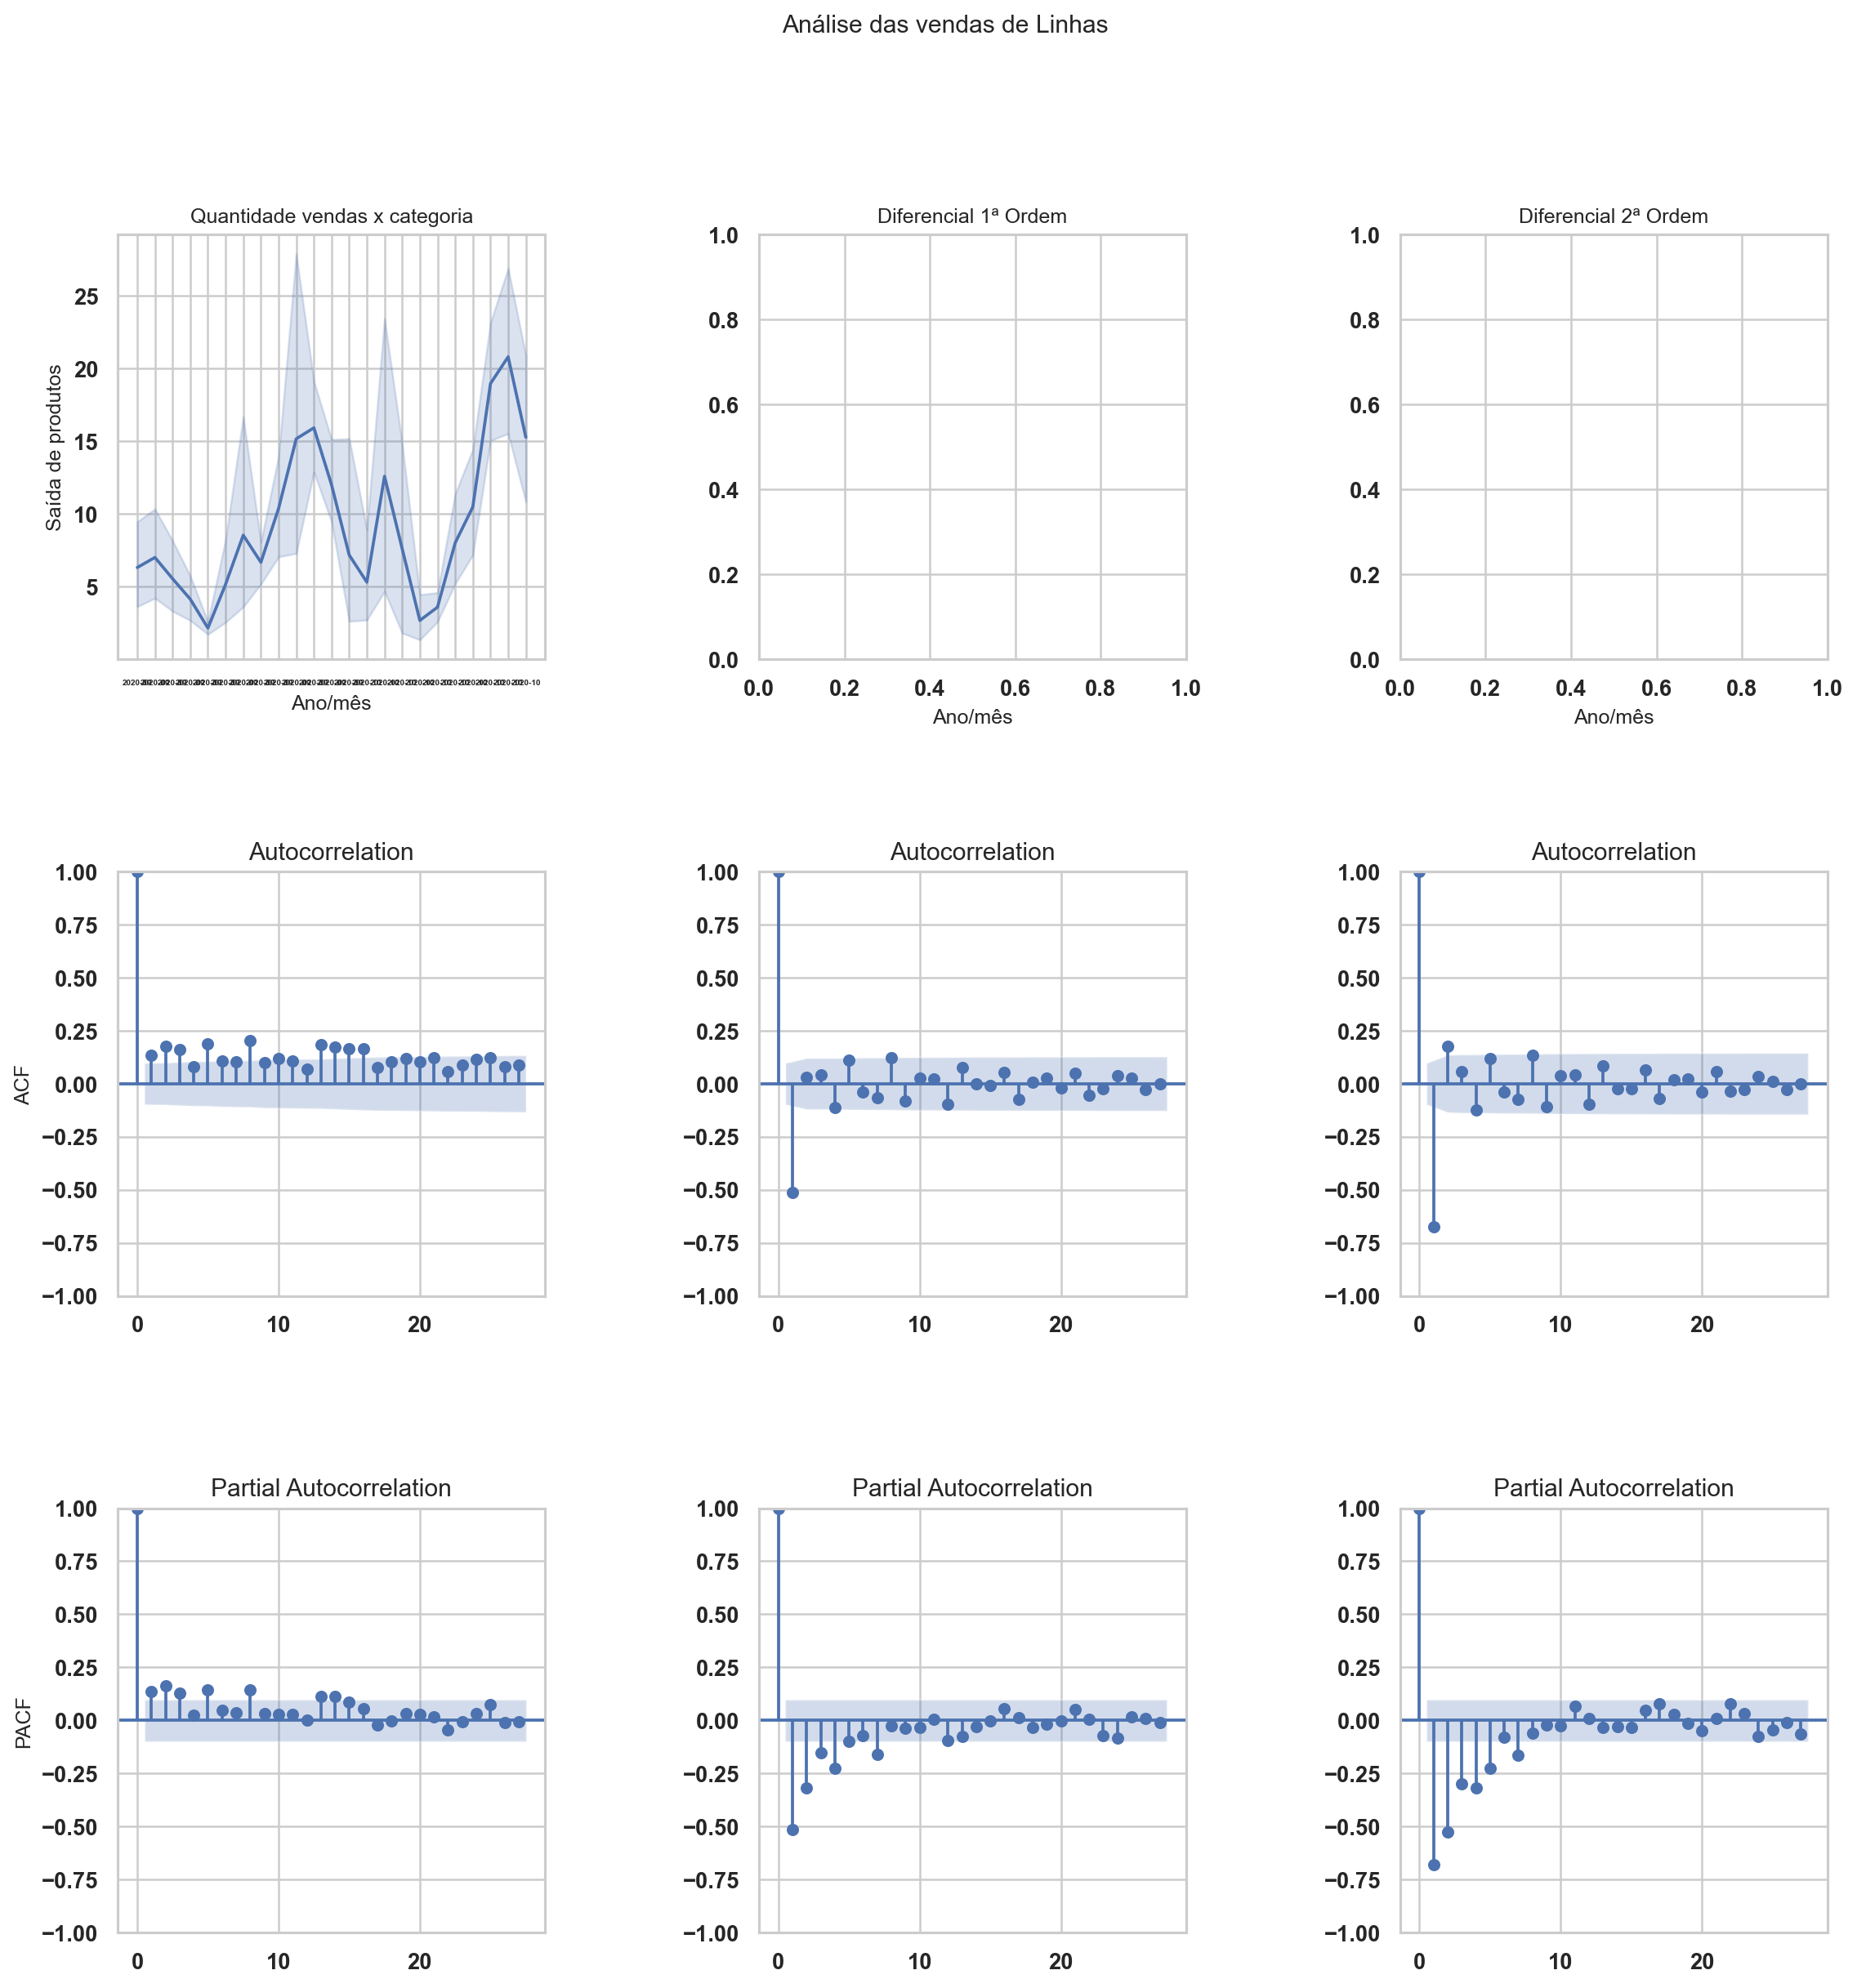

Results of Dickey-Fuller Test:
Test Statistic                  -4.173249
p-value                          0.000731
#Lags Used                       7.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
Test Statistic                  -4.173249
p-value                          0.000731
#Lags Used                       7.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.472377e+00
p-value                        4.073662e-16
#Lags Used                     1.300000e+01
Number of Observations Used    3.910000e+02
Critical Value (1%)           -3.447186e+00
Critical Value (5%)           -2.868960e+00
Critical Value (10%)          -2.570723e+00
dtype: float

In [201]:
  fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
fig.suptitle('Análise das vendas de Lã', fontsize=16)
axes[0,0].set_title('Quantidade vendas x categoria')
axes[0,0].set_ylabel('Saída de produtos')
axes[0,1].set_title('Diferencial 1ª Ordem')
axes[0,2].set_title('Diferencial 2ª Ordem')
axes[1,0].set_title('ACF sem diferencial')
axes[1,0].set_ylabel('ACF')
axes[1,1].set_title('ACF Diferencial 1ª Ordem')
axes[1,2].set_title('ACF Diferencial 2ª Ordem')
axes[2,0].set_title('PACF sem diferencial')
axes[2,0].set_ylabel('PACF')
axes[2,1].set_title('PACF Diferencial 1ª Ordem')
axes[2,2].set_title('PACF Diferencial 2ª Ordem')
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
print('Gráfico de Qtd de vendas por categoria')
try:
    sns.lineplot(x='mes_ano', y=(dados_la['quant_']), data=dados_la,ax=axes[0,0]) #0
    sns.lineplot(x='mes_ano', y=(dados_la['quant_'].diff()), data=dados_la,ax=axes[0,1]) #0
    sns.lineplot(x='mes_ano', y=(dados_la['quant_'].diff().diff()), data=dados_la,ax=axes[0,2]) #   
except:
    print('Não há dados para essa categoria')
print('-'*50)
print('Gráficos de autocorrelação e autocorrelação parcial')
print('-'*50)
print('Gráfico de autocorrelação')
try:
    plot_acf(dados_la['quant_'],ax=axes[1,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_la['quant_'].diff().dropna(),ax=axes[1,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_la['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_la['quant_'],ax=axes[2,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().dropna(),ax=axes[2,1] ) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_la['quant_']))  
#df = pd.DataFrame(adf_test(dados_la['quant_']))
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_la['quant_'].diff().dropna()))
print(adf_test(dados_la['quant_'].diff().diff().dropna()))

Gráfico de Qtd de vendas por categoria
--------------------------------------------------
Gráficos de autocorrelação e autocorrelação parcial
--------------------------------------------------
Gráfico de autocorrelação
--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


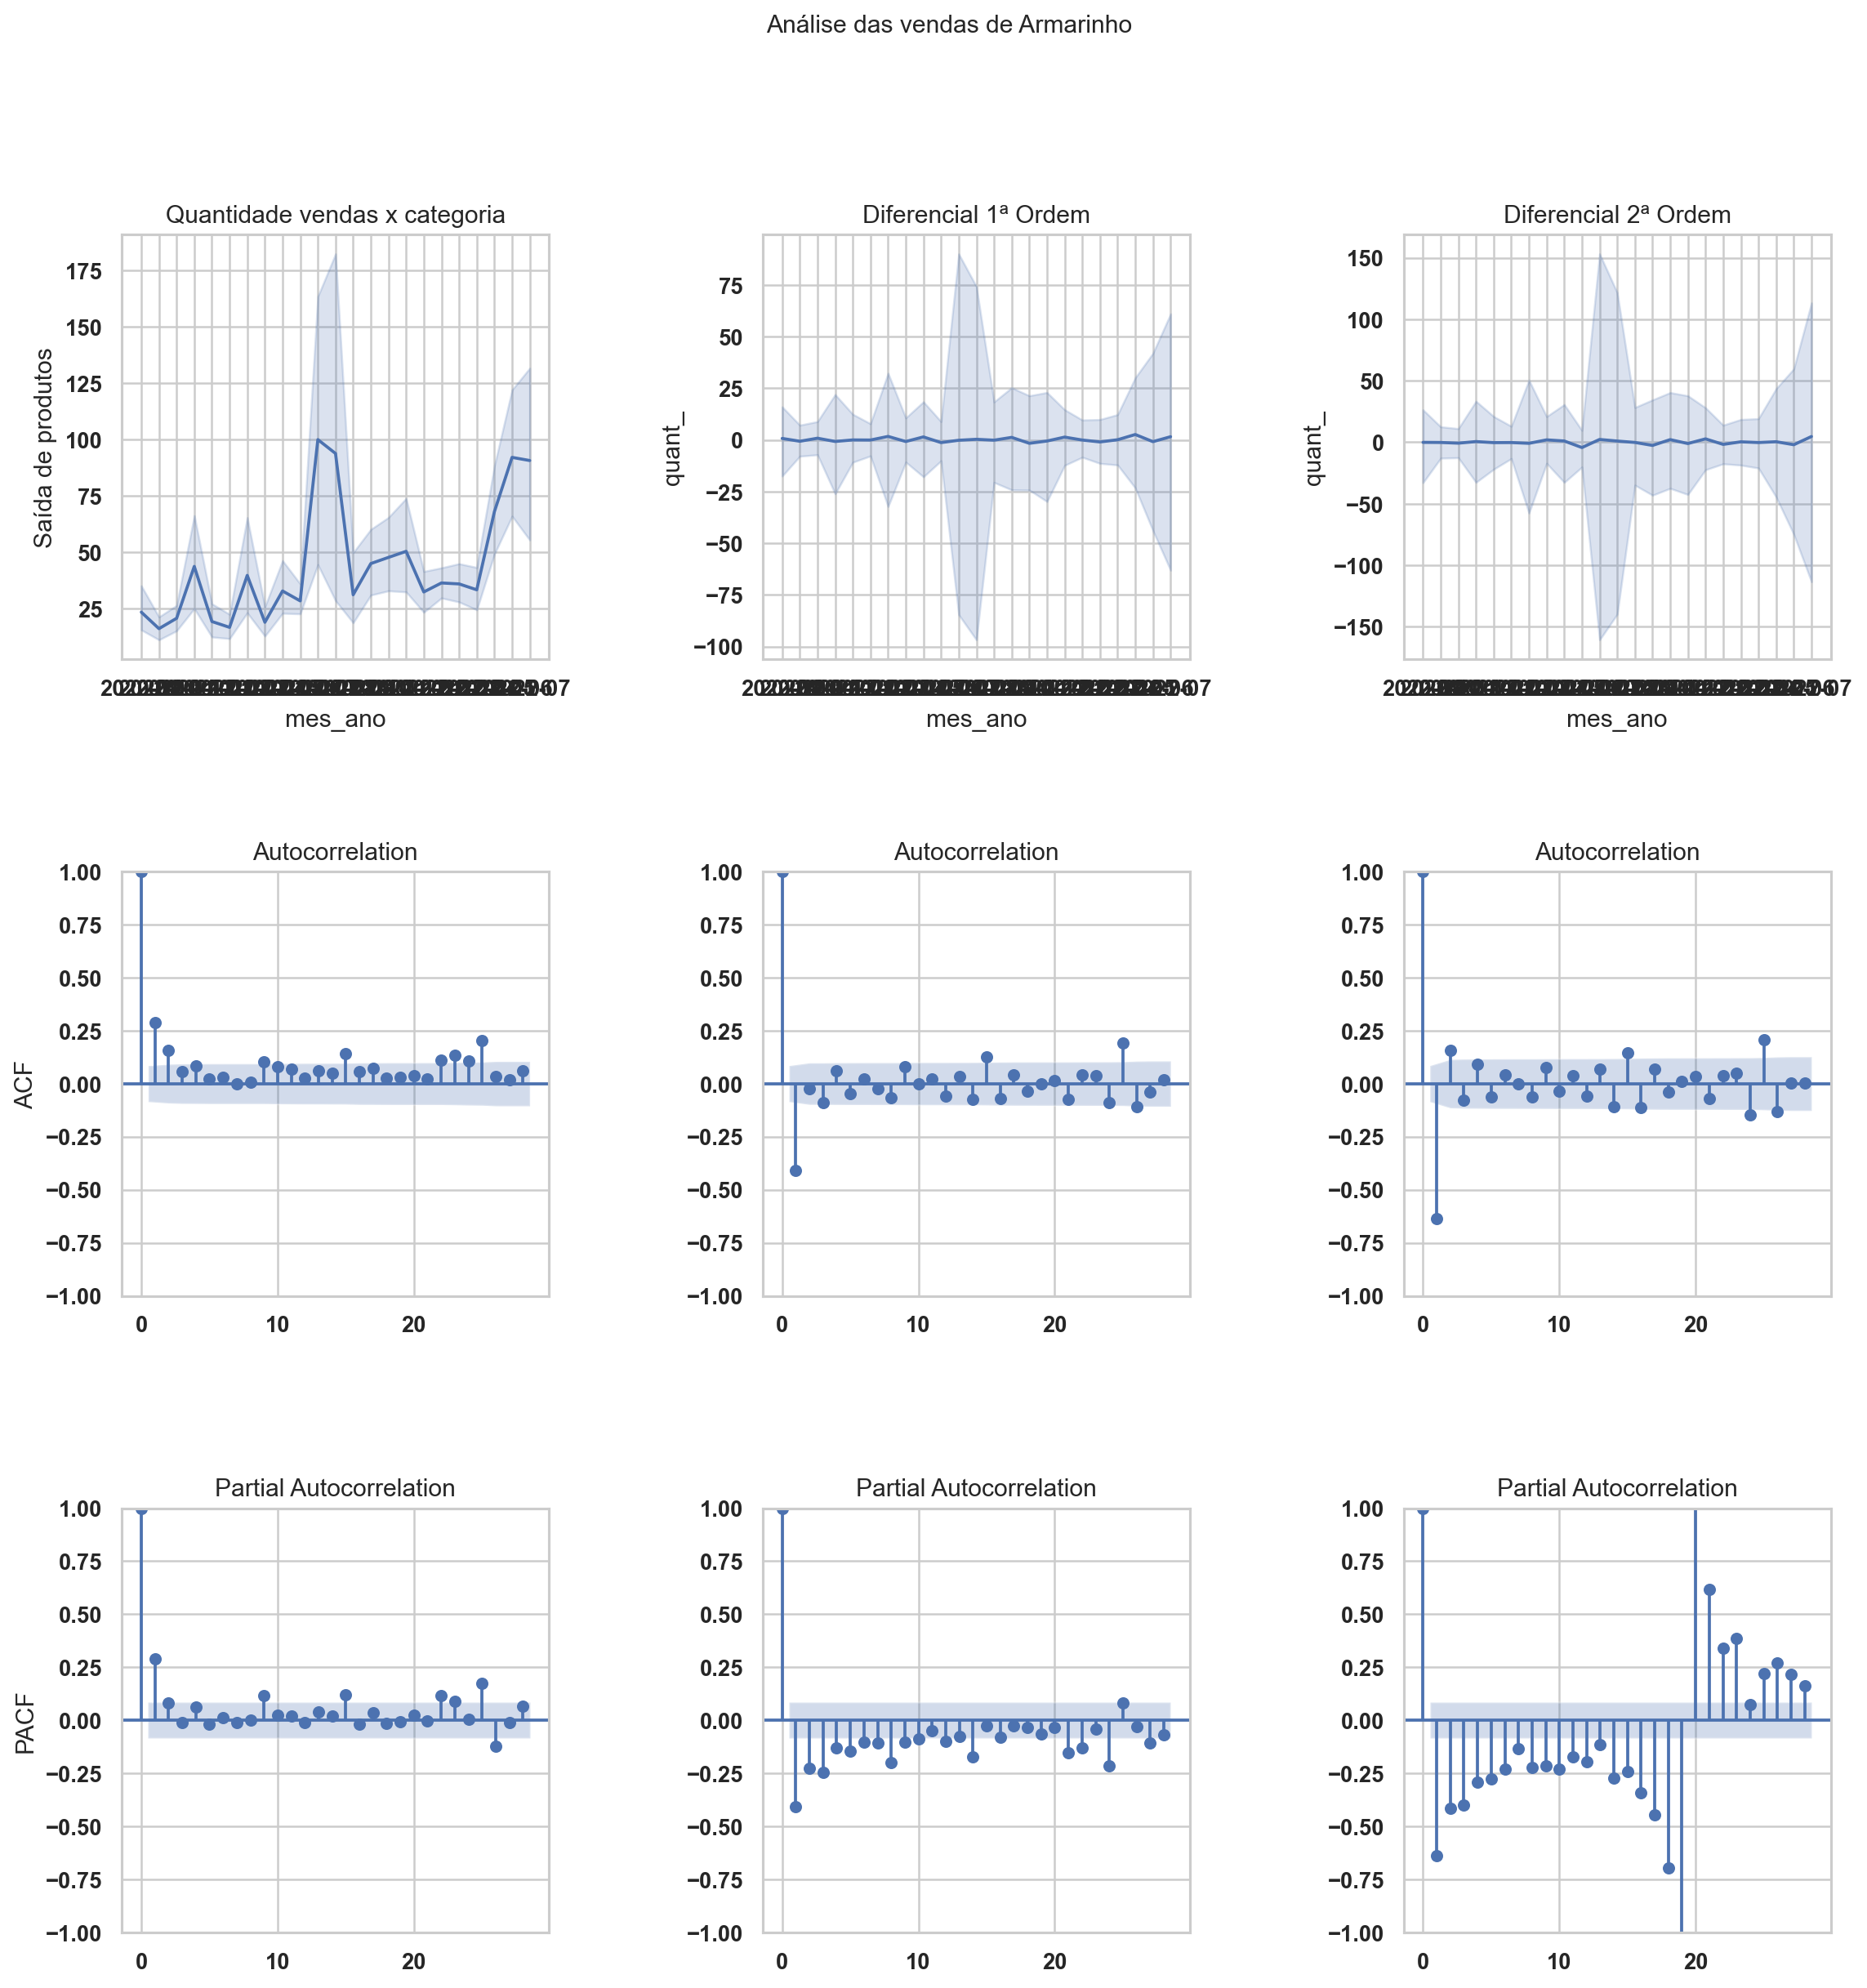

Results of Dickey-Fuller Test:
Test Statistic                -1.265682e+01
p-value                        1.331138e-23
#Lags Used                     1.000000e+00
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)          -2.569677e+00
dtype: float64
Test Statistic                -1.265682e+01
p-value                        1.331138e-23
#Lags Used                     1.000000e+00
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)          -2.569677e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.131388e+01
p-value                        1.220055e-20
#Lags Used                     1.300000e+01
Number of Observations Used    5.180000e+02
Critical Value (1%)           -3.443037e+00
Critical Value (5%)           -2.867136e+00
Critical Value (10%)        

In [175]:
  fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
fig.suptitle('Análise das vendas de Armarinho', fontsize=12)
fig.suptitle('Análise das vendas de Linhas', fontsize=12)
axes[0,0].set_title('Quantidade vendas x categoria', fontsize=10)
axes[0,0].set_xlabel('Ano/mês', fontsize=10)
axes[0,0].set_ylabel('Saída de produtos', fontsize=10)
axes[0,1].set_title('Diferencial 1ª Ordem', fontsize=10)
axes[0,1].set_xlabel('Ano/mês', fontsize=10)
axes[0,2].set_title('Diferencial 2ª Ordem', fontsize=10)
axes[0,2].set_xlabel('Ano/mês', fontsize=10)
axes[1,0].set_title('ACF sem diferencial', fontsize=10)
axes[1,0].set_ylabel('ACF', fontsize=10)
axes[2,0].set_title('PACF sem diferencial', fontsize=10)
axes[2,0].set_ylabel('PACF', fontsize=10)

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
print('Gráfico de Qtd de vendas por categoria')
try:
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_']), data=dados_armarinho,ax=axes[0,0]) #0
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_'].diff()), data=dados_armarinho,ax=axes[0,1]) #0
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_'].diff().diff()), data=dados_armarinho,ax=axes[0,2]) #   
except:
    print('Não há dados para essa categoria')
print('-'*50)
print('Gráficos de autocorrelação e autocorrelação parcial')
print('-'*50)
print('Gráfico de autocorrelação')
try:
    plot_acf(dados_armarinho['quant_'],ax=axes[1,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_armarinho['quant_'].diff().dropna(),ax=axes[1,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_armarinho['quant_'],ax=axes[2,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().dropna(),ax=axes[2,1] ) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_armarinho['quant_']))  
#df = pd.DataFrame(adf_test(dados_armarinho['quant_']))
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_armarinho['quant_'].diff().dropna()))
print(adf_test(dados_armarinho['quant_'].diff().diff().dropna()))

In [128]:
''' Método para Ampliação do estudo'''
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
'''
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 45, 'font.weight': 'bold', 'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
tbl_testes = pd.DataFrame(columns=['categoria','adf','adf2','adf3','pvvalue','pvvalue2','pvvalue3','critical_value','critical_value2','critical_value3'])
tbl_testes_temp = pd.DataFrame(columns=['categoria','adf','adf2','adf3','pvvalue','pvvalue2','pvvalue3','critical_value','critical_value2','critical_value3'])
#Lista_plots = [1,2,3,4,6,7]
#create a time plot 



for categoria in dados_modelo['categoria'].unique():
    dados_modelo_categoria =dados_modelo[dados_modelo['categoria'] == categoria]
    print(categoria.upper())
    
    fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
    axes[0,0].set_title('Quantidade vendas x categoria')
    axes[0,0].set_ylabel('Saída de produtos')
    axes[0,0].set_title(categoria.upper())
    axes[0,1].set_title('Diferencial 1ª Ordem')
    axes[0,2].set_title('Diferencial 2ª Ordem')
    axes[1,0].set_title('ACF sem diferencial')
    axes[1,0].set_ylabel('ACF')
    axes[1,1].set_title('ACF Diferencial 1ª Ordem')
    axes[1,2].set_title('ACF Diferencial 2ª Ordem')
    axes[2,0].set_title('PACF sem diferencial')
    axes[2,0].set_ylabel('PACF')
    axes[2,1].set_title('PACF Diferencial 1ª Ordem')
    axes[2,2].set_title('PACF Diferencial 2ª Ordem')
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

        ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
        ##axes[4].set_xlabel('Quantidade de produtos vendidos')   

        #ax, fig = matplotlib.figure(size(Fig[4,4]))
        #
        #For i in range(len(Fig[4,4])
        #    For j in range(len(Fig[4,4]))
        #        fig.plot(lista_plots[i][j])
        #        ax.plot(fig[i,j])
    print('Gráfico de Qtd de vendas por categoria')
    try:
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_']), data=dados_modelo_categoria,ax=axes[0,0]) #0
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_'].diff()), data=dados_modelo_categoria,ax=axes[0,1]) #0
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_'].diff().diff()), data=dados_modelo_categoria,ax=axes[0,2]) #   
    except:
        print('categoria {0} não possui dados suficientes para plotar gráfico'.format(categoria)) 
    
    print('-'*50)
    print('Gráficos de autocorrelação e autocorrelação parcial')
    print('-'*50)
    print('Gráfico de autocorrelação')
    try:
        plot_acf(dados_modelo_categoria['quant_'],ax=axes[1,0])    #1
    except:
        print('Erro ao plotar autocorrelação')
    try:
        plot_acf(dados_modelo_categoria['quant_'].diff().dropna(),ax=axes[1,1]) #2
    except:
        print('Erro ao plotar autocorrelação')
    try:    
        plot_acf(dados_modelo_categoria['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
    except:
        print('Erro ao plotar autocorrelação')
    print('-'*50)
    print('Gráfico de autocorrelação parcial')
    try:
        plot_pacf(dados_modelo_categoria['quant_'],ax=axes[2,0]) #4
    except:
        print('Erro ao plotar autocorrelação parcial')
    try:    
        plot_pacf(dados_modelo_categoria['quant_'].diff().dropna(),ax=axes[2,1] ) #5
    except:
        print('Erro ao plotar autocorrelação parcial')
    try:    
        plot_pacf(dados_modelo_categoria['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
    except:
        print('Erro ao plotar autocorrelação parcial')
    print('-'*50)
    plt.show()
    
    print('Teste de estacionariedade')
    print('-'*50)

    check_stationarity(dados_modelo_categoria['quant_'])
    tbl_testes_temp['categoria'] = categoria
    tbl_testes_temp['adf'] = check_stationarity(dados_modelo_categoria['quant_'])[0]
    tbl_testes_temp['adf2'] = check_stationarity(dados_modelo_categoria['quant_'])[1]
    tbl_testes_temp['adf3'] = check_stationarity(dados_modelo_categoria['quant_'])[2]
    tbl_testes_temp['pvvalue'] = check_stationarity(dados_modelo_categoria['quant_'])[3]
    tbl_testes_temp['pvvalue2'] = check_stationarity(dados_modelo_categoria['quant_'])[4]
    tbl_testes_temp['pvvalue3'] = check_stationarity(dados_modelo_categoria['quant_'])[5]
    tbl_testes_temp['critvalue'] = check_stationarity(dados_modelo_categoria['quant_'])[6]
    tbl_testes_temp['critvalue2'] = check_stationarity(dados_modelo_categoria['quant_'])[7]
    tbl_testes_temp['critvalue3'] = check_stationarity(dados_modelo_categoria['quant_'])[8]
    tbl_testes = tbl_testes.append(tbl_testes_temp)
   
#       
# 
# print('Decomposição da série temporal aditiva')
#   decompose = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='additive', period=30)
#   print('Decomposição da série temporal multiplicativa de primeira ordem')
#   decompose2 = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='aditive', period=30)
#   print('Decomposição da série temporal multiplicativa de segunda ordem')
#   decompose3 = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='aditive', period=30, extrapolate_trend='freq')

'''

'\nplt.style.use(\'seaborn-whitegrid\')\nplt.rcParams["figure.figsize"] = (10,8)\nplt.rcParams.update({\'font.size\': 45, \'font.weight\': \'bold\', \'font.family\': \'sans-serif\', \'font.sans-serif\': \'Arial\'})\ntbl_testes = pd.DataFrame(columns=[\'categoria\',\'adf\',\'adf2\',\'adf3\',\'pvvalue\',\'pvvalue2\',\'pvvalue3\',\'critical_value\',\'critical_value2\',\'critical_value3\'])\ntbl_testes_temp = pd.DataFrame(columns=[\'categoria\',\'adf\',\'adf2\',\'adf3\',\'pvvalue\',\'pvvalue2\',\'pvvalue3\',\'critical_value\',\'critical_value2\',\'critical_value3\'])\n#Lista_plots = [1,2,3,4,6,7]\n#create a time plot \n\n\n\nfor categoria in dados_modelo[\'categoria\'].unique():\n    dados_modelo_categoria =dados_modelo[dados_modelo[\'categoria\'] == categoria]\n    print(categoria.upper())\n    \n    fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)\n    axes[0,0].set_title(\'Quantidade vendas x categoria\')\n    axes[0,0].set_ylabel(\'Saída de produtos\')\n    axes[0,0].set_title(ca

In [130]:
tbl_testes.drop_duplicates(inplace=True,keep='last')
tbl_testes.head(24).reset_index(drop=True)


NameError: name 'tbl_testes' is not defined

In [131]:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
modelo = dados_linha
dado = modelo[['mes_ano','quant_']].groupby(['mes_ano']).sum()
dado




quant_
mes_ano        
2020-09   497.0
2020-10   584.0
2020-11   354.0
2020-12   493.0
2021-01   258.0
...         ...
2022-03   402.0
2022-04   346.0
2022-05   361.0
2022-06   367.0
2022-07   332.0

[23 rows x 1 columns]

In [132]:

p = 1
q = 1
d = 4
arima_model1 = sm.tsa.arima.ARIMA(dado, order=(p,q,d))
arima_model1.fit()
print(arima_model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                 quant_   No. Observations:                   23
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -127.929
Date:                Tue, 18 Oct 2022   AIC                            261.858
Time:                        20:57:43   BIC                            264.992
Sample:                    09-01-2020   HQIC                           262.538
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1749      0.147     -8.007      0.000      -1.462      -0.887
ar.L2         -0.5281      0.176     -2.995      0.003      -0.874      -0.183
sigma2      1.058e+04   3885.027      2.723      0.0

In [133]:


import pmdarima as pm

model = pm.auto_arima(dado, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=284.764, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=268.001, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=282.783, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=263.824, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=265.601, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=261.858, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=266.013, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=263.654, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best mode

In [134]:


import pmdarima as pm

model = pm.auto_arima(dado, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=4,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1 ,start_Q=1, 
                      D=12, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,4,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,4,0)(0,0,0)[0]             : AIC=303.630, Time=0.01 sec
 ARIMA(1,4,0)(0,0,0)[0]             : AIC=281.168, Time=0.02 sec
 ARIMA(0,4,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,4,0)(0,0,0)[0]             : AIC=263.820, Time=0.04 sec
 ARIMA(3,4,0)(0,0,0)[0]             : AIC=261.804, Time=0.05 sec
 ARIMA(4,4,0)(0,0,0)[0]             : AIC=261.379, Time=0.11 sec
 ARIMA(5,4,0)(0,0,0)[0]             : AIC=262.165, Time=0.13 sec
 ARIMA(4,4,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,4,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(5,4,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(4,4,0)(0,0,0)[0] intercept   : AIC=263.288, Time=0.17 sec

Best model:  ARIMA(4,4,0)(0,0,0)[0]          
Total fit time: 0.894 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   N

In [169]:
model =  sm.tsa.arima.ARIMA(dado, order=(2,2,0))
fit_model = model.fit()
d= fit_model.forecast(12, alpha=0.05)  # 95% conf
predictions = pd.DataFrame(d, columns=['mes_ano','predito'])
predictions

Empty DataFrame
Columns: [mes_ano, predito]
Index: []

In [171]:
d= fit_model.forecast(12, alpha=0.05)  # 9
d

2022-08-01    349.922163
2022-09-01    327.321336
2022-10-01    324.379928
2022-11-01    319.742537
2022-12-01    306.715151
2023-01-01    304.440480
2023-02-01    293.963844
2023-03-01    287.444611
2023-04-01    280.607622
2023-05-01    272.053967
2023-06-01    265.684960
2023-07-01    257.655912
Freq: MS, Name: predicted_mean, dtype: float64

ValueError: If using all scalar values, you must pass an index

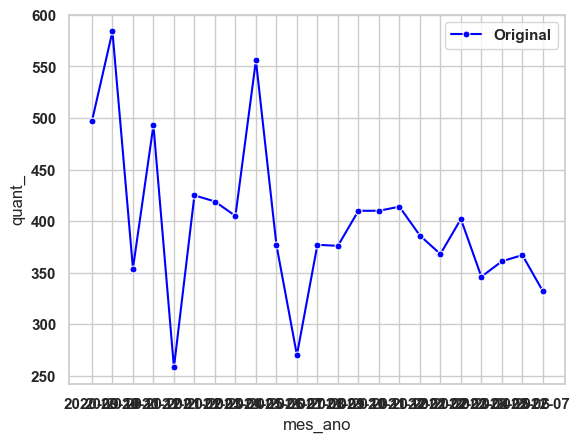

In [155]:


sns.lineplot(x=dado.index, y=dado['quant_'], data=dado, label='Original', color='blue', marker='o', markersize=5)
sns.lineplot(x=d[1], y=d[0], data=dado, label='Forecast', color='red', marker='o', markersize=5)


In [136]:



p = 2
q = 2
d = 0
arima_model = sm.tsa.arima.ARIMA(dado, order=(p,q,d))
arima_model.fit()
print(arima_model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                 quant_   No. Observations:                   23
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -127.929
Date:                Tue, 18 Oct 2022   AIC                            261.858
Time:                        20:57:46   BIC                            264.992
Sample:                    09-01-2020   HQIC                           262.538
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1749      0.147     -8.007      0.000      -1.462      -0.887
ar.L2         -0.5281      0.176     -2.995      0.003      -0.874      -0.183
sigma2      1.058e+04   3885.027      2.723      0.0

In [ ]:

p = 1
q = 1
d = 4
P = 1
Q = 1
D = 0
m = 12

sarima_model = sm.tsa.statespace.SARIMAX(dado, order=(p,q,d), seasonal_order=(P,Q,D,m))
results = sarima_model.fit()
print(results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                              quant_   No. Observations:                   23
Model:             SARIMAX(1, 1, 4)x(1, 1, [], 12)   Log Likelihood                 -59.921
Date:                             Tue, 18 Oct 2022   AIC                            133.842
Time:                                     01:18:37   BIC                            135.960
Sample:                                 09-01-2020   HQIC                           131.519
                                      - 07-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2057      5.477     -0.038      0.970     -10.941      10.529
ma.L1         -0.6760    42

In [ ]:
p = range(0, 3)
d = range(1,4)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 2, 0, 12)
SARIMAX: (0, 1, 2) x (0, 2, 1, 12)


<AxesSubplot:xlabel='mes_ano', ylabel='quant_'>

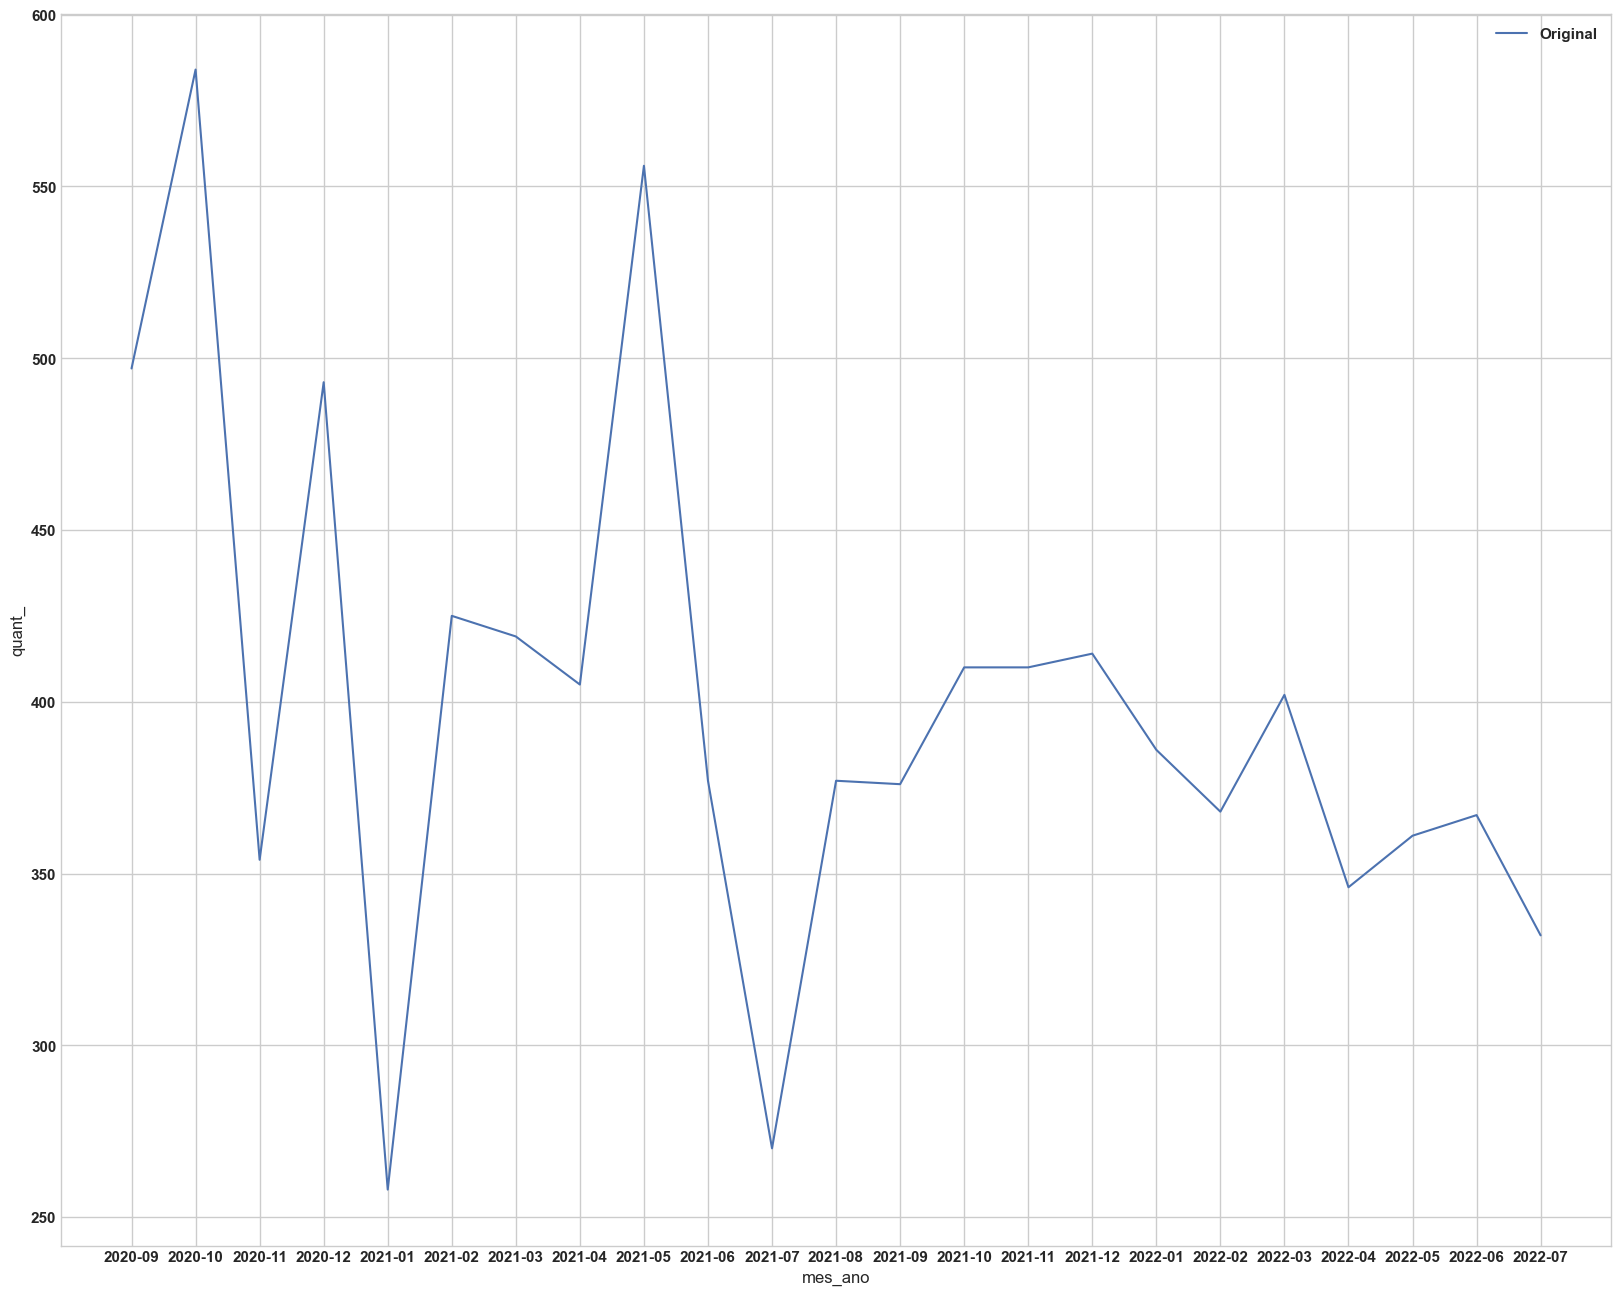

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 16), dpi=100)

plt.rcParams.update({'font.size': 45, 'font.weight': 'bold', 'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
sns.lineplot(x=dado.index, y=dado['quant_'], label='Original')


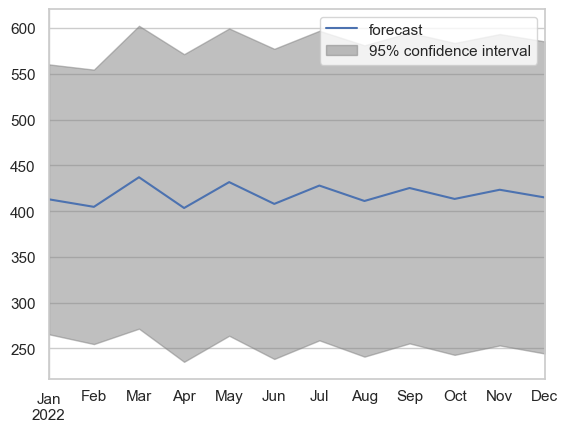

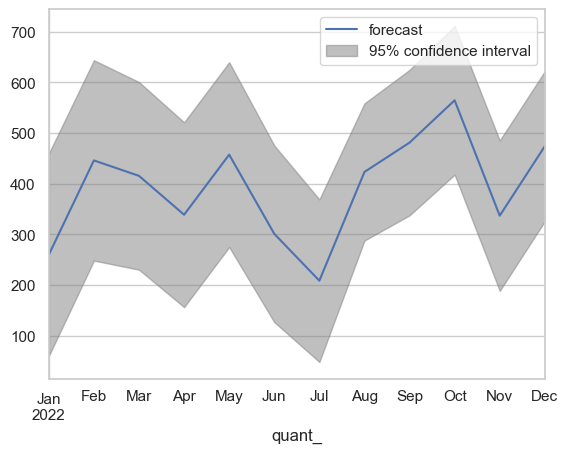

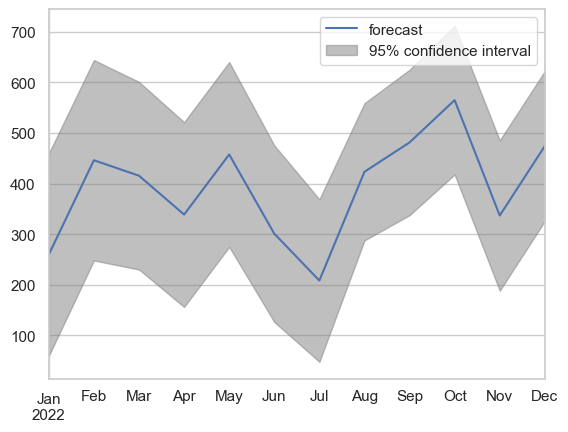

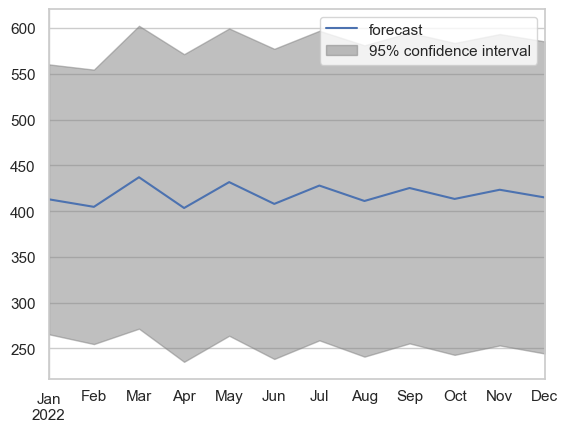

In [ ]:

# Actual vs Fitted
plot_predict(sarima_model.fit(),dpi = 100,start ='2022-01-01', end= '2022-12-01', lags=4)
sns.lineplot(dado['quant_'],color='red')
plot_predict(sarima_model.fit(), dpi=100, plot_insample=False,dynamic=False, lags=4, start='2022-01-01', end='2022-12-01')
plot_predict(arima_model1.fit(), dpi=100, plot_insample=False,dynamic=True, lags=4, start='2022-01-01', end='2022-12-01')

In [ ]:
dt_ar = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
dt_ar

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'], dtype='datetime64[ns]', freq='MS')

In [ ]:
fc, se, conf = arima_model.forecast(203, alpha=0.05)  # 95% conf

fc_series    = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'forecast'

<AxesSubplot:xlabel='mes_ano', ylabel='quant_'>

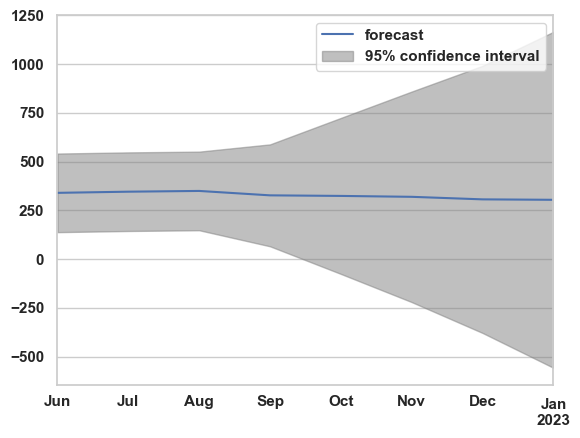

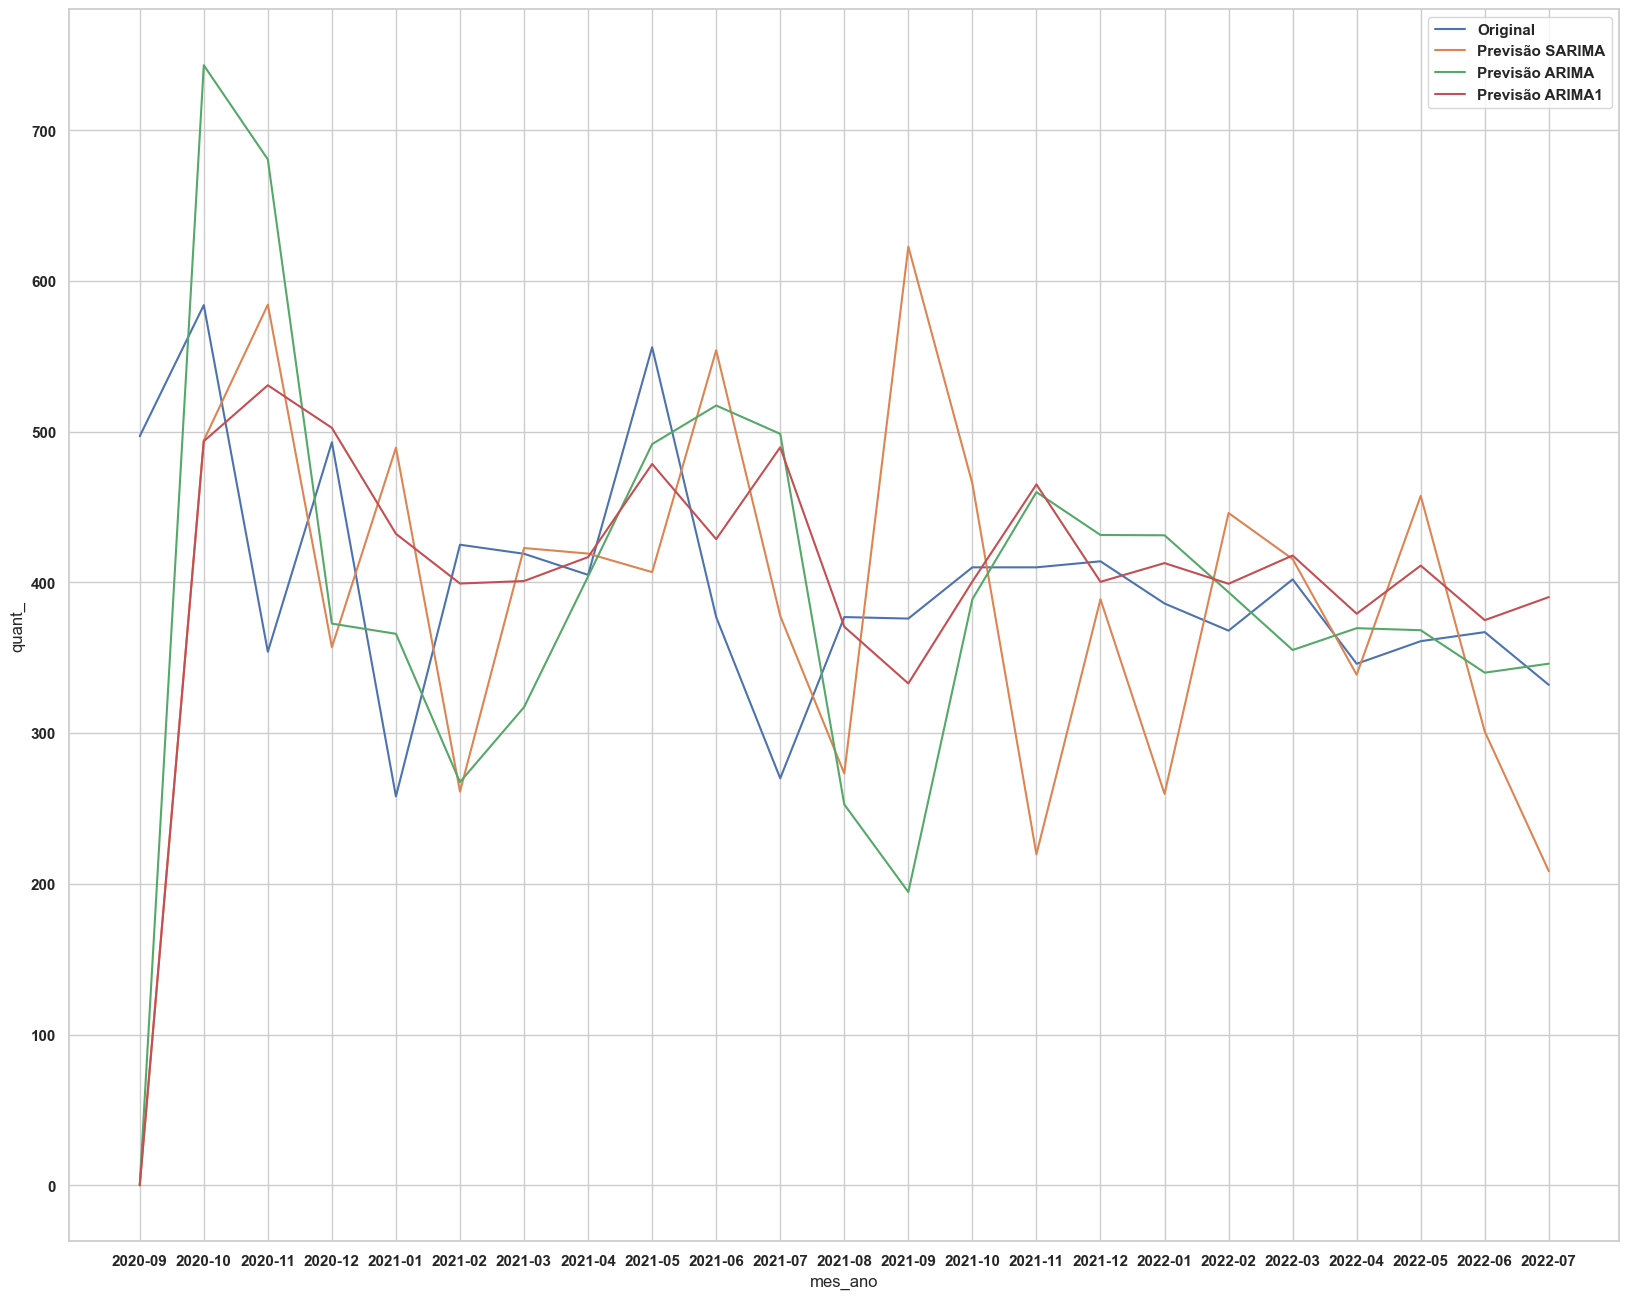

In [ ]:

plot_predict(arima_model.fit(),dpi = 100,start ='2022-06-01', end= '2023-01-01', lags=4,)
fig, ax1 = plt.subplots(figsize=(20, 16), dpi=100)

plt.rcParams.update({'font.size': 45, 'font.weight': 'bold', 'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
sns.lineplot(x=dado.index, y=dado['quant_'], label='Original')
sns.lineplot(x=dado.index, y=results.predict(), label='Previsão SARIMA')
sns.lineplot(x=dado.index, y=arima_model.fit().predict(), label='Previsão ARIMA')
sns.lineplot(x=dado.index, y=arima_model1.fit().predict(), label='Previsão ARIMA1')

NameError: name 'sarima_model' is not defined

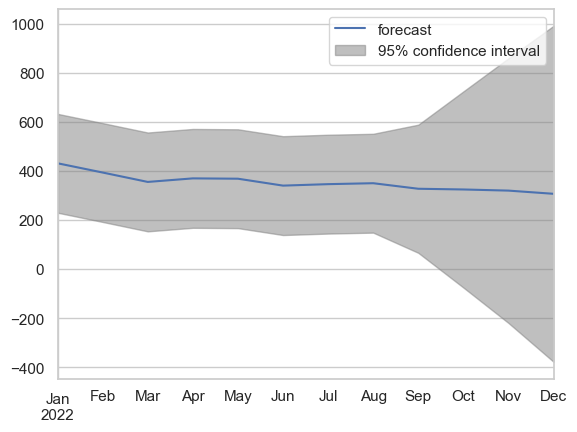

In [ ]:

# Actual vs Fitted

plot_predict(arima_model.fit(),dpi = 100,start ='2022-01-01', end= '2022-12-01', lags=4,)


# Actual vs Fitted
plot_predict(sarima_model.fit(),dpi = 100,start ='2022-04-01', end= '2022-10-01', lags=4)
plot_predict(sarima_model.fit(), dpi=100, plot_insample=False,dynamic=False, lags=4,start='2022-01-01', end='2022-12-01')
plt

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [ ]:
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, 1], predictions

In [ ]:

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [ ]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

>expected=377.0, predicted=381.1
>expected=376.0, predicted=377.0
>expected=410.0, predicted=395.1
>expected=410.0, predicted=539.6
>expected=414.0, predicted=392.2
>expected=386.0, predicted=291.9
>expected=368.0, predicted=394.2
>expected=402.0, predicted=377.5
>expected=346.0, predicted=400.6
>expected=361.0, predicted=401.4
>expected=367.0, predicted=384.8
>expected=332.0, predicted=373.8
MAE: 39.235


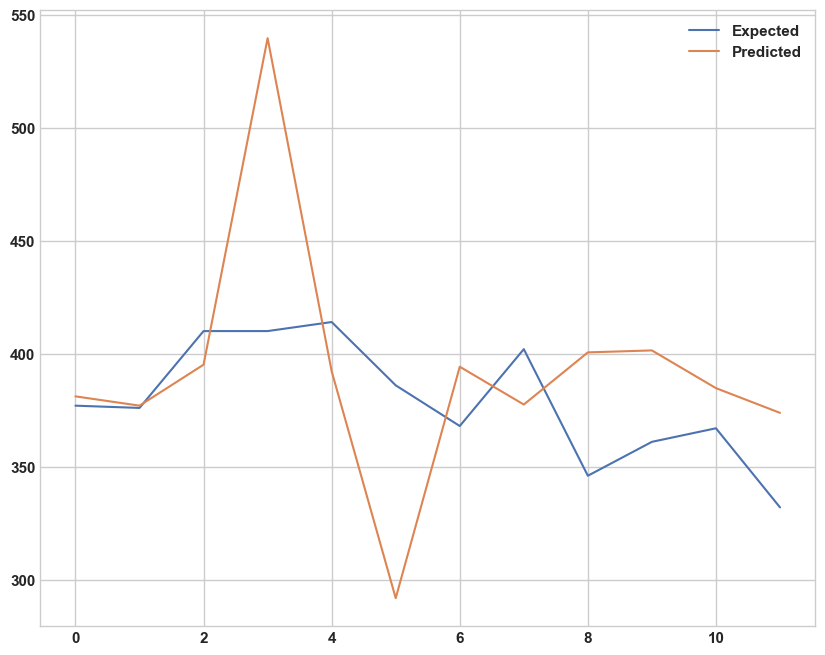

In [54]:

 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions
 
# load the dataset
series = dado
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [59]:
MASE = mean_absolute_scaled_error(y, yhat)
print('MASE: %.3f' % MASE)


MASE: 2.574


In [56]:
def mean_absolute_scaled_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true - np.mean(y_true))))
    

In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
MAPE = mean_absolute_percentage_error(y, yhat)
print('MAPE: %.3f' % MAPE)

MAPE: 10.323


Results of Dickey-Fuller Test:
Test Statistic                  -29.496748
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    4136.000000
Critical Value (1%)              -3.431932
Critical Value (5%)              -2.862239
Critical Value (10%)             -2.567142
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -19.824370
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    4107.000000
Critical Value (1%)              -3.431943
Critical Value (5%)              -2.862244
Critical Value (10%)             -2.567145
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -24.410293
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    4106.000000
Critical Value (1%)              -3.431944
Critical Value (5%)              -2.862244
Critica